In [186]:
using CircularArrays
using BenchmarkTools
using Plots

In [62]:
o = 'o'
x = 'x'

m = CircularArray([
o x o;
x o x;
x o x])

# what position each number represents
#1 2 3
#4 5 6
#7 8 9

pos = 12
println(pos)

num = Int(ceil(pos/3))
rem = pos % 3

println([num,rem])

println(m[num,rem])

m[3,1]= '-'
print(m)


12
[4, 0]
o
['o' 'x' 'o'; 'x' 'o' 'x'; '-' 'o' 'x']

In [54]:
#wins = Set([[1,2,3],[4,5,6],[7,8,9],[1,4,7],[2,5,8],[3,6,9],[1,5,9],[3,5,7]])


In [2]:
function check(v::Array)
    if 1 ∈ v && 2 ∈ v && 3 ∈ v
        return 1
    elseif 4 ∈ v && 5 ∈ v && 6 ∈ v
        return 1
    elseif 7 ∈ v && 8 ∈ v && 9 ∈ v
        return 1
    elseif 1 ∈ v && 4 ∈ v && 7 ∈ v
        return 1
    elseif 2 ∈ v && 5 ∈ v && 8 ∈ v
        return 1
    elseif 3 ∈ v && 6 ∈ v && 9 ∈ v
        return 1
    elseif 1 ∈ v && 5 ∈ v && 9 ∈ v
        return 1
    elseif 3 ∈ v && 5 ∈ v && 7 ∈ v
        return 1
    else
        return 0
    end
end

check (generic function with 1 method)

In [153]:
function placement(v₁::Array,v₂::Array)
    blank = CircularArray([
    '-' '-' '-';
    '-' '-' '-';
    '-' '-' '-'
    ])
    for i ∈ v₁
        num = Int(ceil(i/3))
        rem = i % 3
        blank[num,rem] = 'X'
    end
    
    for j ∈ v₂
        num = Int(ceil(j/3))
        rem = j % 3
        blank[num,rem] = 'O'
    end
    
    return blank
end

placement (generic function with 2 methods)

In [154]:


numbers = Set(1:9)
p₁ = []
p₂ = []
turn = 1

while check(p₁) == 0 && check(p₂) == 0 && isempty(numbers) == false
    
    if turn == 1
        x = rand(numbers)
        append!(p₁,x)
        delete!(numbers,x)
    end
    
    if turn == -1
        x = rand(numbers)
        append!(p₂,x)
        delete!(numbers,x)       
    end
    
    turn *= -1
    
end

println(p₁)
println(p₂)
println()

if check(p₁) == 1
    println("Player 1 wins")
elseif check(p₂) == 1
    println("player 2 wins")
else
    println("Everyone loses")
end

println()


placement(p₁,p₂)


Any[2, 9, 3, 7, 5]
Any[1, 4, 8, 6]

Player 1 wins



3×3 CircularArray(::Matrix{Char}):
 'O'  'X'  'X'
 'O'  'X'  'O'
 'X'  'O'  'X'

In [265]:
player₁ = 0
player₂ = 0

turn₅ = 0
turn₆ = 0
turn₇ = 0
turn₈ = 0
turn₉ = 0
draw = 0


w₅ = Set([])
w₆ = Set([])
w₇ = Set([])
w₈ = Set([])
w₉ = Set([])
d₉ = Set([])


unique = []

rounds = 50000



@time begin

    for i ∈ 1:rounds

        numbers = Set(1:9)
        p₁ = []
        p₂ = []
        turn = 1

        while check(p₁) == 0 && check(p₂) == 0 && isempty(numbers) == false

            if turn == 1
                x = rand(numbers)
                append!(p₁,x)
                delete!(numbers,x)
            end

            if turn == -1
                x = rand(numbers)
                append!(p₂,x)
                delete!(numbers,x)       
            end

            turn *= -1

        end
        
        if length(p₁) + length(p₂) == 5
            turn₅ += 1
            push!(w₅,placement(p₁,p₂))
        elseif length(p₁) + length(p₂) == 6
            turn₆ += 1
            push!(w₆,placement(p₁,p₂))
        elseif length(p₁) + length(p₂) == 7
            turn₇ += 1
            push!(w₇,placement(p₁,p₂))
        elseif length(p₁) + length(p₂) == 8
            turn₈ += 1
            push!(w₈,placement(p₁,p₂))
        elseif length(p₁) + length(p₂) == 9 && check(p₁) == 0 && check(p₂) == 0
            draw += 1
            push!(d₉,placement(p₁,p₂))
        else
            turn₉ += 1
            push!(w₉,placement(p₁,p₂))
        end
            
        if check(p₁) == 1
            player₁ += 1
        elseif check(p₂) == 1
            player₂ += 1
        end
            
        append!(unique,length(w₅) + length(w₆) + length(w₇) + length(w₈) + length(w₉) + length(d₉))



    end
        

    println("For "*string(rounds)*" rounds played:")    
    println("Wins for player 1: "*string(player₁)*", Percentage: "*string(round(100*player₁/rounds,digits = 2))*"%" )
    println("Wins for player 2: "*string(player₂)*", Percentage: "*string(round(100*player₂/rounds,digits = 2))*"%" )
    println("Draws: "*string(draw)*", Percentage: "*string(round(100*draw/rounds,digits = 2))*"%")
        
    println("Unique final results: "*string(length(w₅) + length(w₆) + length(w₇) + length(w₈) + length(w₉) + length(d₉)))
        
    println()
        
    println("Wins on turn 5 (X): "*string(turn₅)*", Percentage: "*string(round(100*turn₅/rounds,digits = 2))*"%")
    println("Wins on turn 6 (O): "*string(turn₆)*", Percentage: "*string(round(100*turn₆/rounds,digits = 2))*"%")
    println("Wins on turn 7 (X): "*string(turn₇)*", Percentage: "*string(round(100*turn₇/rounds,digits = 2))*"%")
    println("Wins on turn 8 (O): "*string(turn₈)*", Percentage: "*string(round(100*turn₈/rounds,digits = 2))*"%")
    println("Wins on turn 9 (X): "*string(turn₉)*", Percentage: "*string(round(100*turn₉/rounds,digits = 2))*"%")
        
        
        
        
    println()    

        
end


For 50000 rounds played:
Wins for player 1: 29373, Percentage: 58.75%
Wins for player 2: 14308, Percentage: 28.62%
Draws: 6319, Percentage: 12.64%
Unique final results: 958

Wins on turn 5 (X): 4752, Percentage: 9.5%
Wins on turn 6 (O): 4299, Percentage: 8.6%
Wins on turn 7 (X): 13218, Percentage: 26.44%
Wins on turn 8 (O): 10009, Percentage: 20.02%
Wins on turn 9 (X): 11403, Percentage: 22.81%

  0.695670 seconds (2.67 M allocations: 98.033 MiB, 3.81% gc time)


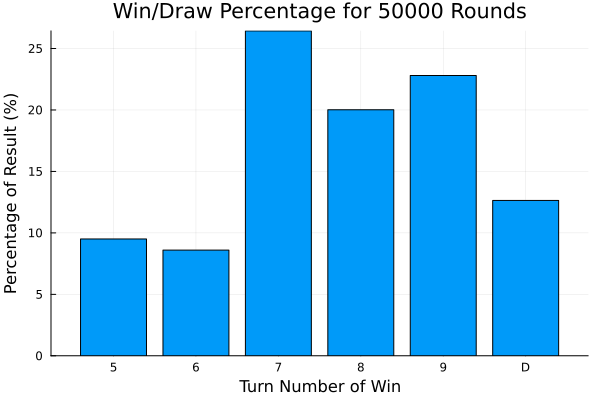

In [266]:
bar(['5','6','7','8','9','D'],100/rounds*[turn₅, turn₆, turn₇, turn₈, turn₉, draw] , legend = false)
title!("Win/Draw Percentage for "*string(rounds)*" Rounds")
ylabel!("Percentage of Result (%)")
xlabel!("Turn Number of Win")

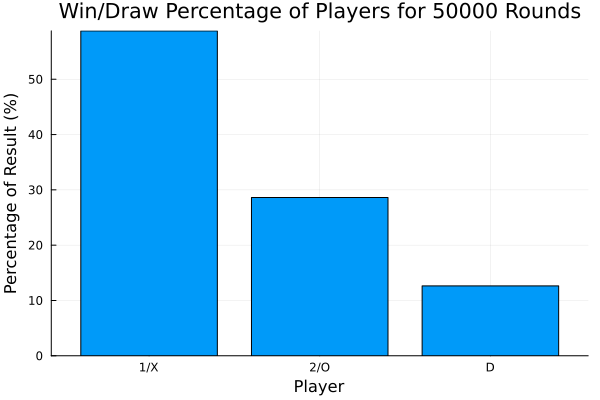

In [267]:
bar(["1/X","2/O","D"],100/rounds*[player₁, player₂, draw] , legend = false)
title!("Win/Draw Percentage of Players for "*string(rounds)*" Rounds")
ylabel!("Percentage of Result (%)")
xlabel!("Player")

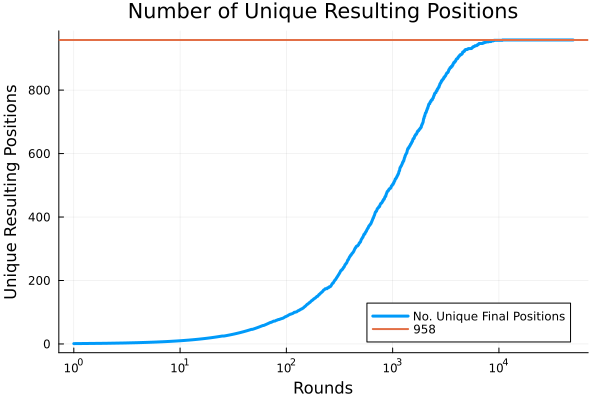

In [269]:
plot(unique,legend = true,linewidth = 3,xaxis=:log,label="No. Unique Final Positions")
hline!([958],linewidth = 2,label = "958")
xlabel!("Rounds")
ylabel!("Unique Resulting Positions")
title!("Number of Unique Resulting Positions")


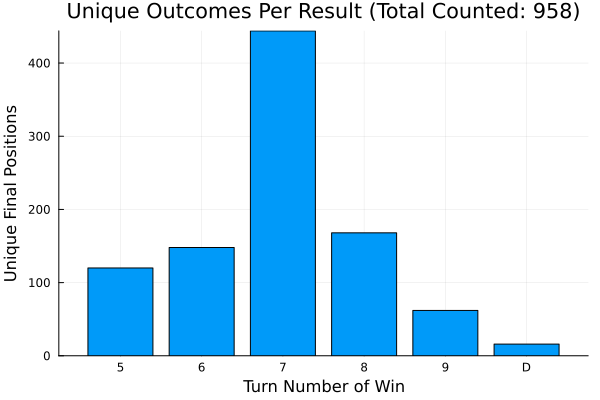

In [270]:
bar(['5','6','7','8','9','D'],[length(w₅), length(w₆), length(w₇), length(w₈), length(w₉), length(d₉)] , legend = false)
title!("Unique Outcomes Per Result (Total Counted: "*string(length(w₅) + length(w₆) + length(w₇) + length(w₈) + length(w₉) + length(d₉))*")")
ylabel!("Unique Final Positions")
xlabel!("Turn Number of Win")